# Práctica 2 
### Suliman Hassan - Pablo Medina Quintana

In [46]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


TAREA 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

FILA: 12
NÚMERO MÁXIMO DE PÍXELES BLANCOS: 220


Filas con más del 90% de píxeles blancos: [  6  12  15  20  21  88 100]
Número de píxeles en esas filas: [203 220 204 200 201 199 212]


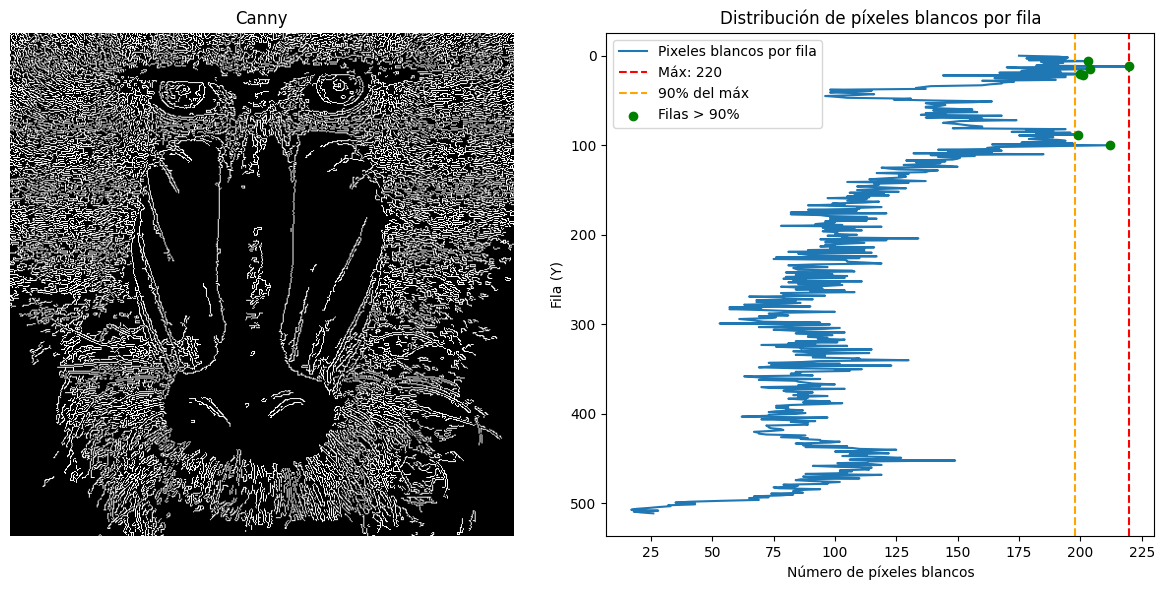

In [47]:

img = cv2.imread("./mandril.jpg")
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas (ancho) y al valor máximo de un píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:,0] 
sum_whites = rows // 255
max_whites_row = max(sum_whites)
print("FILA: " + str(np.argmax(sum_whites)))
print("NÚMERO MÁXIMO DE PÍXELES BLANCOS: " + str(max_whites_row))
print("\n")
threshold = 0.9 * max_whites_row
rows_over_90 = np.where(sum_whites > threshold)[0]
print("Filas con más del 90% de píxeles blancos:", rows_over_90)
print("Número de píxeles en esas filas:", sum_whites[rows_over_90])

# Gráfico
plt.figure(figsize=(12, 6))

# Imagen Canny
plt.subplot(1, 2, 1)
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.title("Canny")

# Gráfico de píxeles blancos por fila (alineado con la imagen)
plt.subplot(1, 2, 2)
plt.plot(sum_whites, np.arange(len(sum_whites)), label="Pixeles blancos por fila")
plt.axvline(max_whites_row, color="red", linestyle="--", label=f"Máx: {max_whites_row}")
plt.axvline(threshold, color="orange", linestyle="--", label=f"90% del máx")
plt.scatter(sum_whites[rows_over_90], rows_over_90, color="green", zorder=5, label="Filas > 90%")
plt.ylabel("Fila (Y)")
plt.xlabel("Número de píxeles blancos")
plt.title("Distribución de píxeles blancos por fila")
plt.legend()
plt.gca().invert_yaxis()  # Para que coincida con la orientación de la imagen
plt.tight_layout()
plt.show()





TAREA 2: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Máximo filas = 216, Máximo columnas = 219
Filas destacadas: [  2   3   4   5   8  11  12  19  20  24  51  80  81  82  83  84  85  87
 100]
Columnas destacadas: [104 105 127 288]


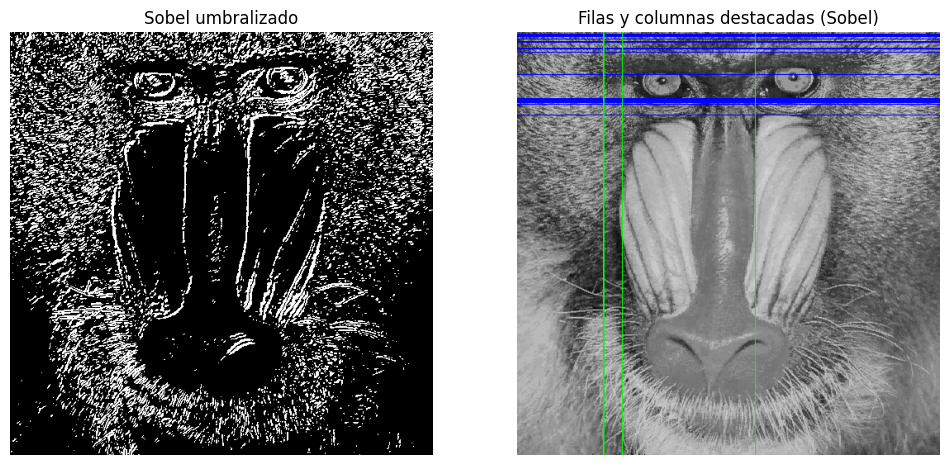

In [48]:
gris = cv2.cvtColor(cv2.imread('mandril.jpg'), cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
sobel = cv2.add(sobelx, sobely)

# 2. Convertir a 8 bits
sobel8 = cv2.convertScaleAbs(sobel)

# 3. Umbralizado sobre Sobel
valorUmbral = 100  # puedes ajustar
_, sobelUmbral = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

# 4. Conteo por filas y columnas
conteoFilas = np.count_nonzero(sobelUmbral, axis=1)
conteoCols = np.count_nonzero(sobelUmbral, axis=0)

# 5. Calcular máximos y umbrales
maxFila = np.max(conteoFilas)
maxCol = np.max(conteoCols)

umbralFila = 0.9 * maxFila
umbralCol = 0.9 * maxCol

# 6. Detectar filas y columnas destacadas
filasDestacadas = np.where(conteoFilas >= umbralFila)[0]
colsDestacadas = np.where(conteoCols >= umbralCol)[0]

print(f"Máximo filas = {maxFila}, Máximo columnas = {maxCol}")
print(f"Filas destacadas: {filasDestacadas}")
print(f"Columnas destacadas: {colsDestacadas}")

# 7. Dibujar sobre la imagen original
imgMarcada = gris.copy()
imgMarcada = cv2.cvtColor(imgMarcada, cv2.COLOR_GRAY2BGR)  # pasar a color para pintar

for f in filasDestacadas:
    cv2.line(imgMarcada, (0, f), (imgMarcada.shape[1], f), (0,0,255), 1)  # rojo

for c in colsDestacadas:
    cv2.line(imgMarcada, (c, 0), (c, imgMarcada.shape[0]), (0,255,0), 1)  # verde

# Mostrar resultados
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Sobel umbralizado")
plt.imshow(sobelUmbral, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Filas y columnas destacadas (Sobel)")
plt.imshow(imgMarcada)
plt.axis("off")
plt.show()

TAREA 3: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [49]:
cap = cv2.VideoCapture(0)

modo = 0   # 0: normal, 1: inverso, 2: reducción bits
bits = 8   # profundidad inicial (máx 8 bits por canal)

print("Controles:")
print(" - Tecla 'm' para cambiar de modo")
print(" - Tecla 'a' para reducir bits (solo en modo 2)")
print(" - Tecla 'd' para aumentar bits (solo en modo 2)")
print(" - Tecla 'q' para salir")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if modo == 0:
        # Modo normal
        salida = frame.copy()

    elif modo == 1:
        # Modo inverso
        salida = cv2.bitwise_not(frame)

    elif modo == 2:
        # Modo reducción de bits
        factor = 2 ** bits
        salida = np.floor(frame / (256/factor)) * (256/factor)
        salida = salida.astype(np.uint8)
        cv2.putText(salida, f"Bits: {bits}", (10,30), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0,255,0), 2, cv2.LINE_AA)

    # Mostrar resultado
    cv2.imshow("Demostrador", salida)

    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    elif k == ord('m'):
        modo = (modo + 1) % 3  # cambiar modo
    elif k == ord('a'):  # disminuir bits
        if modo == 2 and bits > 1:
            bits -= 1
    elif k == ord('d'):  # aumentar bits
        if modo == 2 and bits < 8:
            bits += 1

cap.release()
cv2.destroyAllWindows()

Controles:
 - Tecla 'm' para cambiar de modo
 - Tecla 'a' para reducir bits (solo en modo 2)
 - Tecla 'd' para aumentar bits (solo en modo 2)
 - Tecla 'q' para salir


TAREA 4: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [50]:
import mediapipe as mp
import pygame

# Inicializar pygame mixer
pygame.mixer.init()

# Carga de sonidos 
songs = {
    "rock": "acdc.mp3",
    "reggae": "bob_marley.mp3",
    "surf": "surf.mp3"
}

# Inicializar MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)

current_gesture = None  # Para recordar el gesto activo

def detect_gesture(hand_landmarks):
    """Regla muy básica: según qué dedos están extendidos, asignar un gesto."""
    tips = [8, 12, 16, 20]  # Índice, medio, anular, meñique
    fingers = []

    # Pulgar
    if hand_landmarks.landmark[4].x < hand_landmarks.landmark[3].x:
        fingers.append(1)
    else:
        fingers.append(0)

    # Otros dedos
    for tip in tips:
        if hand_landmarks.landmark[tip].y < hand_landmarks.landmark[tip-2].y:
            fingers.append(1)
        else:
            fingers.append(0)

    if fingers == [0,1,0,0,1]:
        return "rock"   # gesto de rock
    elif fingers == [0,1,1,0,0]:
        return "reggae" # dos dedos en V
    elif fingers == [1,0,0,0,1]:
        return "surf"   # gesto surfero
    return None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb)

    gesture = None
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            gesture = detect_gesture(hand_landmarks)

    # Control de música según gesto
    if gesture != current_gesture:
        # Si cambia el gesto, para la canción anterior
        pygame.mixer.music.stop()
        current_gesture = gesture

        # Si hay un gesto válido, reproduce la nueva
        if gesture in songs:
            pygame.mixer.music.load(songs[gesture])
            pygame.mixer.music.play(-1)  # -1 = loop

    cv2.imshow("Demo Mano Musical", frame)
    if cv2.waitKey(1) & 0xFF == 27:  
        break

cap.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
